## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import matplotlib.pyplot as plt

In [2]:
from BufferStock import BufferStockClass

model = BufferStockClass()

model.setup()

model.allocate()

## Solution and timings

50 grid points (75 in post-decision grid for $A$).

In [3]:
for solmethod in ['vfi','nvfi','egm']:    
    
        print(f'---{solmethod.upper()}--- \n')        
        
        # A. Solution method
        model.par.solmethod = solmethod

        # B. Test run (Numba compilation)
        print('Test run:')
        
        tic = time.time()
        model.solve(do_print=False)
        toc = time.time()

        print(f'Model solved with {model.par.solmethod} in {toc-tic:.1f} secs')
        print(f'Mean consumption t = 0: {model.checksum():.6f} \n')

        # C. Final run
        print('Final run:')

        tic = time.time()
        model.solve(do_print=True)
        toc = time.time()

        print(f'Mean consumption t = 0: {model.checksum():.6f} \n')

---VFI--- 

Test run:
Model solved with vfi in 22.4 secs
Mean consumption t = 0: 4.244820 

Final run:
t = 4 solved in 0.0 secs (post-decision in 0.0 secs)
t = 3 solved in 0.6 secs (post-decision in 0.0 secs)
t = 2 solved in 0.5 secs (post-decision in 0.0 secs)
t = 1 solved in 0.9 secs (post-decision in 0.0 secs)
t = 0 solved in 1.3 secs (post-decision in 0.0 secs)
Model solved with vfi in 3.3 secs
Mean consumption t = 0: 4.244820 

---NVFI--- 

Test run:
Model solved with nvfi in 19.7 secs
Mean consumption t = 0: 4.242599 

Final run:
t = 4 solved in 0.0 secs (post-decision in 0.0 secs)
t = 3 solved in 0.1 secs (post-decision in 0.1 secs)
t = 2 solved in 0.1 secs (post-decision in 0.0 secs)
t = 1 solved in 0.1 secs (post-decision in 0.0 secs)
t = 0 solved in 0.1 secs (post-decision in 0.0 secs)
Model solved with nvfi in 0.4 secs
Mean consumption t = 0: 4.242599 

---EGM--- 

Test run:
Model solved with egm in 8.0 secs
Mean consumption t = 0: 4.242599 

Final run:
t = 4 solved in 0.0 s

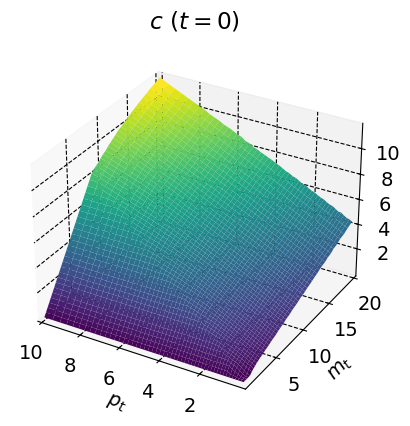

In [4]:
model.consumption_function(t=0)

## Simulation

Model simulated in 9.3 secs


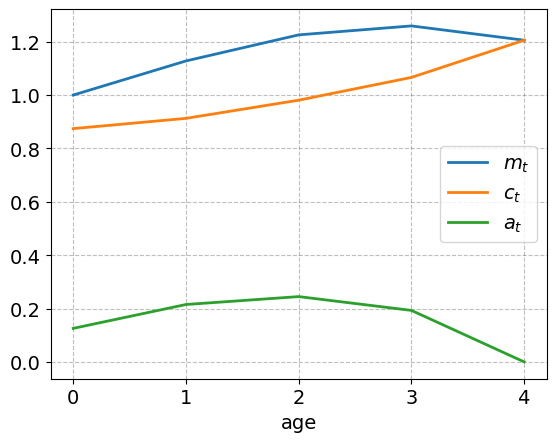

In [5]:
model.simulate()

model.lifecycle()